In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 初期値とか

days,r0,Dを色々いじって検証

In [2]:
days = 300 #開始時から最終日までの日付を表す
r0 = 2.5 #基本再生産数
D = 10 #感染期間
n = 1000 #総人口

In [3]:
people = np.zeros((days,3))  #[S:感受性のある人間，I:現在感染している人間,R:免疫を所持している人間]を示す行列people,列の総和 = 1000
peopleint = np.zeros((days,3)) # peopleをintで返す行列  

In [4]:
def susceptible(n,S,I,r0,D):#感受性のある人の数を更新する関数
    NS = S - ((r0/D) * S * I )/ n
    return NS

In [5]:
def infected(n,S,I,r0,D):#現在の感染者の数を更新する関数
    NI = I +  ((r0/D) * S * I)/n - I/D
    return NI

In [6]:
def recover(I,R,D):#回復した人の数を更新する関数
    NR = R + I/D
    return NR

In [7]:
def graphplot(people , days):# グラフ作成
    x = np.arange(150)
    y1= people[x,0] 
    y2= people[x,1]
    y3= people[x,2]
    
    fig = plt.figure()
    fig.add_subplot(111)
    plt.plot(x, y1, color="r",label = "susceptible")
    plt.plot(x, y2, color="b",label = "infected")
    plt.plot(x, y3, color="g",label = "recover")
    
    plt.ylabel("population")
    plt.xlabel("day")
    plt.legend()
    plt.show()

In [8]:
def main():
    people[0,:] = [999,1,0]
    #print(people[0,:])
    for i in range (days-1):
        people[i+1,0] = susceptible(n,people[i,0],people[i,1],r0,D)
        people[i+1,1] = infected(n,people[i,0],people[i,1],r0,D)
        people[i+1,2] = recover(people[i,1],people[i,2],D)
        #print(people[i+1,:])
    
    graphplot(people,days)   

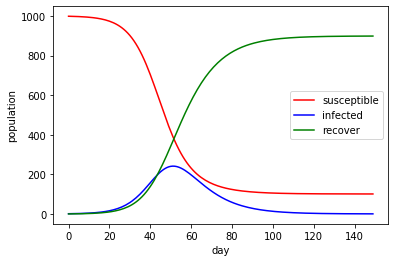

In [9]:
main()